# **Import Libraries and get dataset**

In [462]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn  as sns
import numpy as np

In [463]:
dataset = pd.read_csv('data/data-tc.csv')

In [464]:
isCount = dataset['FP'].count()
print(f'Total Data is {isCount}')

Total Data is 3314


# **Data Cleaning**

In [465]:
dataset.isna().sum()

B_Req         0
R_Priority    0
FP            0
Complexity    0
Time          0
Cost          0
dtype: int64

In [466]:
dataset.dropna(inplace=True)

In [467]:
def remove_outliers(data: pd.DataFrame, column: str) -> pd.Series:
    q3, q1 = np.nanpercentile(data[column], [75, 25])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

    return data

dataset = remove_outliers(dataset, 'Complexity')
dataset = remove_outliers(dataset, 'Time')
dataset = remove_outliers(dataset, 'Cost')

In [468]:
dataset.drop(['B_Req'], axis=1, inplace=True)

# **Preprocess Data**

In [469]:
label_encoder = LabelEncoder()
dataset["R_Priority"] = label_encoder.fit_transform(dataset["R_Priority"])

In [470]:
dataset["FP"] = dataset["FP"].apply(lambda x: len(x.split(",")))

scaler = StandardScaler()
dataset[["Complexity", "Time", "Cost"]] = scaler.fit_transform(dataset[["Complexity", "Time", "Cost"]])

In [471]:
X = dataset[['Complexity', 'Time', 'Cost']]

<AxesSubplot:>

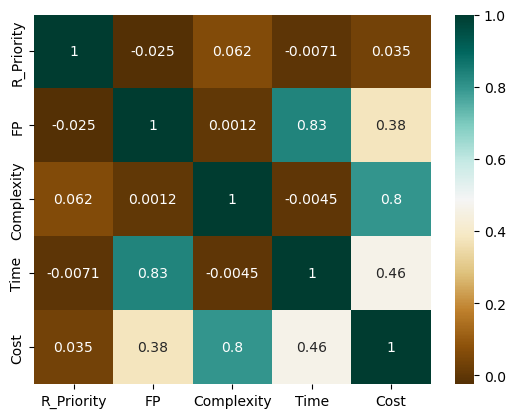

In [472]:
heatcol = dataset.corr()
sns.heatmap(heatcol,cmap="BrBG",annot=True)

# **K-Means**

In [473]:
from sklearn.cluster import KMeans

In [474]:
kmeans = KMeans(n_clusters=3, random_state=0,max_iter=50)
dataset['Class'] = kmeans.fit_predict(X)

In [475]:
score_avg = silhouette_score(X, dataset['Class'])
print(f"Score: {score_avg}")

Score: 0.48674762232922003


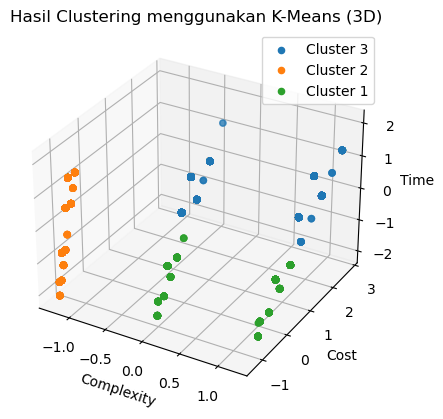

In [476]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cluster_num in dataset['Class'].unique():
    cluster_data = dataset[dataset['Class'] == cluster_num]
    ax.scatter(
        cluster_data['Complexity'], 
        cluster_data['Cost'], 
        cluster_data['Time'], 
        label=f'Cluster {cluster_num + 1}')

ax.set_xlabel('Complexity')
ax.set_ylabel('Cost')
ax.set_zlabel('Time')
ax.legend()
plt.title('Hasil Clustering menggunakan K-Means (3D)')
plt.show()

**Split Data**

In [477]:
X_train, X_test = train_test_split(dataset, test_size=0.2, random_state=42)

In [478]:
dataset.to_csv('data/kmeans/data-preprocess.csv', index=False)

X_train.to_csv('data/kmeans/data-train.csv', index=False)
X_test.to_csv('data/kmeans/data-test.csv', index=False)

In [479]:
dataset_kmeans = dataset.copy()

In [480]:
dataset.drop(['Class'], axis=1, inplace=True)

# **Hierarchical**

In [481]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_clustering.fit_predict(X)

dataset['Class'] = agg_clustering.labels_

In [482]:
silhouette = silhouette_score(X, dataset['Class'])
print(f"Score: {silhouette}")

Score: 0.44229176122404473


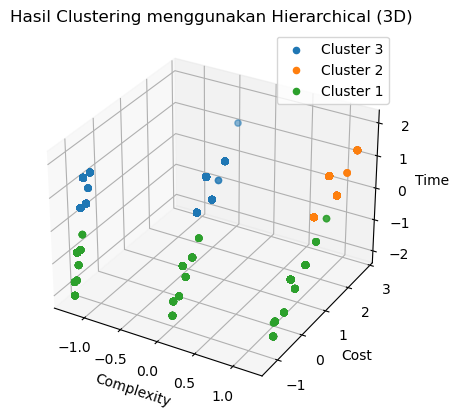

In [483]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cluster_num in dataset['Class'].unique():
    cluster_data = dataset[dataset['Class'] == cluster_num]
    ax.scatter(
        cluster_data['Complexity'], 
        cluster_data['Cost'], 
        cluster_data['Time'], 
        label=f'Cluster {cluster_num + 1}')

ax.set_xlabel('Complexity')
ax.set_ylabel('Cost')
ax.set_zlabel('Time')
ax.legend()
plt.title('Hasil Clustering menggunakan Hierarchical (3D)')
plt.show()

**Split Data**

In [484]:
X_train, X_test = train_test_split(dataset, test_size=0.2, random_state=42)

In [485]:
dataset.to_csv('data/hierarchical/data-preprocess.csv', index=False)

X_train.to_csv('data/hierarchical/data-train.csv', index=False)
X_test.to_csv('data/hierarchical/data-test.csv', index=False)

In [486]:
dataset_hierarchical = dataset.copy()

In [487]:
dataset.drop(['Class'], axis=1, inplace=True)

# **Spectral**

In [488]:
from sklearn.cluster import SpectralClustering

spectral_clustering = SpectralClustering(n_clusters=3, eigen_solver='arpack', affinity="rbf")
spectral_clustering.fit_predict(X)

dataset['Class'] = spectral_clustering.labels_

In [489]:
silhouette = silhouette_score(X, dataset['Class'])
print(f"Score: {silhouette}")

Score: 0.46919752754066224


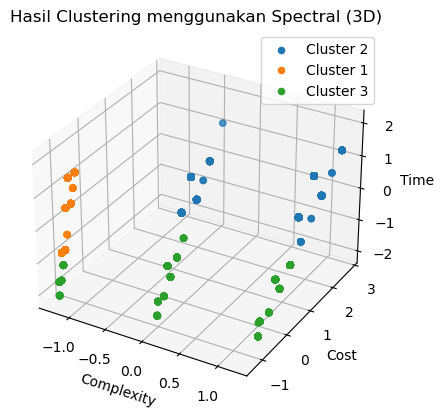

In [490]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cluster_num in dataset['Class'].unique():
    cluster_data = dataset[dataset['Class'] == cluster_num]
    ax.scatter(
        cluster_data['Complexity'], 
        cluster_data['Cost'], 
        cluster_data['Time'], 
        label=f'Cluster {cluster_num + 1}')

ax.set_xlabel('Complexity')
ax.set_ylabel('Cost')
ax.set_zlabel('Time')
ax.legend()
plt.title('Hasil Clustering menggunakan Spectral (3D)')
plt.show()

**Split Data**

In [491]:
X_train, X_test = train_test_split(dataset, test_size=0.2, random_state=42)

In [492]:
dataset.to_csv('data/spectral/data-preprocess.csv', index=False)

X_train.to_csv('data/spectral/data-train.csv', index=False)
X_test.to_csv('data/spectral/data-test.csv', index=False)

In [493]:
dataset_spectral = dataset.copy()

In [494]:
dataset.drop(['Class'], axis=1, inplace=True)

# **Class Distribution**

<AxesSubplot:xlabel='Class', ylabel='Count'>

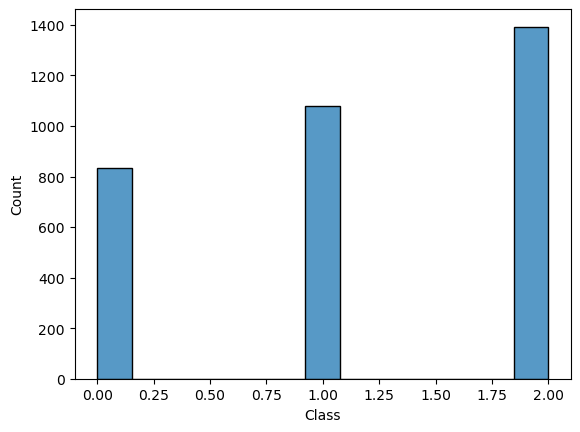

In [495]:
sns.histplot(dataset_kmeans['Class'])

<AxesSubplot:xlabel='Class', ylabel='Count'>

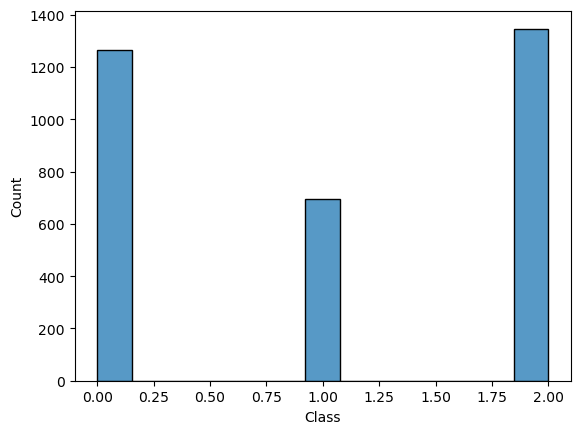

In [496]:
sns.histplot(dataset_hierarchical['Class'])

<AxesSubplot:xlabel='Class', ylabel='Count'>

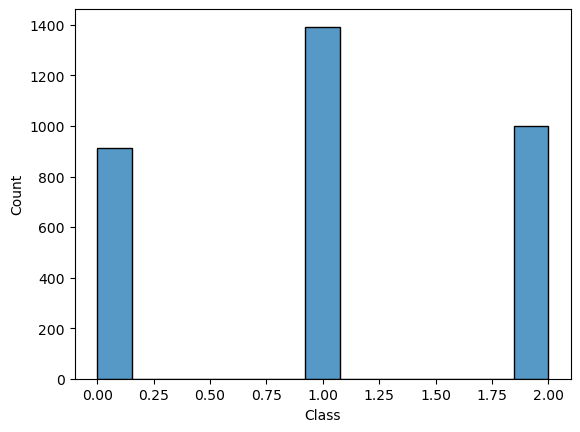

In [497]:
sns.histplot(dataset_spectral['Class'])